In [2]:
#Laba3 start
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import (DecisionTreeClassifier,
                          DecisionTreeRegressor,
                          plot_tree)
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             mean_absolute_error,
                             auc,
                             roc_curve)


  PassengerId   Age    VIP  FoodCourt  ShoppingMall       Spa    VRDeck  \
0     0013_01  27.0  False   0.000000      0.000000  0.000000  0.000000   
1     0018_01  19.0  False   0.000356      0.000000  0.142260  0.000000   
2     0019_01  31.0  False   0.000000      0.000000  0.000000  0.000000   
3     0021_01  38.0  False   0.263206      0.000000  0.009121  0.026266   
4     0023_01  20.0  False   0.000000      0.076580  0.000000  0.000000   
5     0027_01  31.0  False   0.063902      0.031717  0.005694  0.002694   
6     0029_01  21.0  False   0.000000      0.000000  0.000000  0.000000   
7     0032_01  20.0  False   0.000000      0.000000  0.000000  0.000000   
8     0032_02  23.0  False   0.000000      0.000000  0.000000  0.000000   
9     0033_01  24.0  False   0.025284      0.000000  0.000000  0.000000   

   Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                    False                      False   
1                    False                      False   
2  

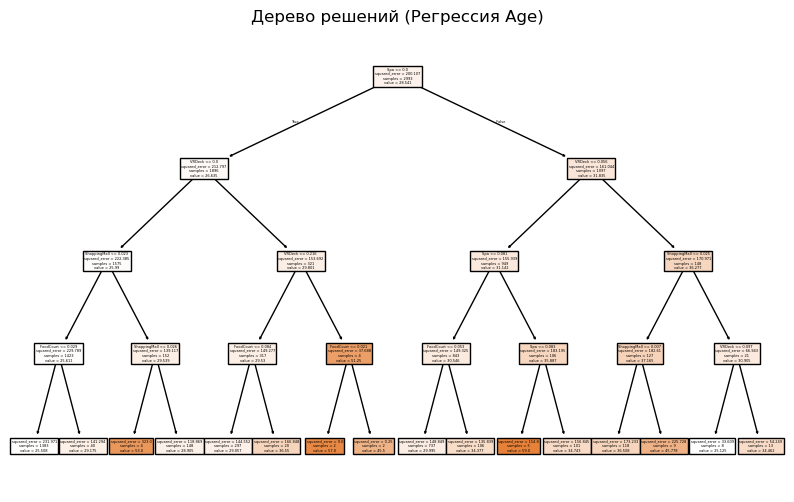

In [12]:
df = pd.read_csv("data/processed_test.csv")

print(df.head(10))


#Regression

X_cols_1 = ["FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
y_col_1 = "Age"

X_regression = df[X_cols_1]
y_regression = df[y_col_1]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_regression, y_regression, test_size = 0.3, random_state = 42)

regression_tree_model = DecisionTreeRegressor(max_depth = 4, random_state = 42)
regression_tree_model.fit(X_train_r, y_train_r)

y_predict_test_r = regression_tree_model.predict(X_test_r)

MSE = mean_squared_error(y_test_r, y_predict_test_r)
RMSE = root_mean_squared_error(y_test_r, y_predict_test_r)
MAE = mean_absolute_error(y_test_r, y_predict_test_r)

print('Mean Square Error: ', MSE)
print('Root MSE: ', RMSE)
print('Mean Absolute Error: ', MAE)

plt.figure(figsize = (10, 6))
plot_tree(regression_tree_model, filled = True, feature_names = X_regression.columns)
plt.title("Дерево решений (Регрессия Age)")
plt.show()

[False  True]
ROC-AUC metric:  0.8060452684258418


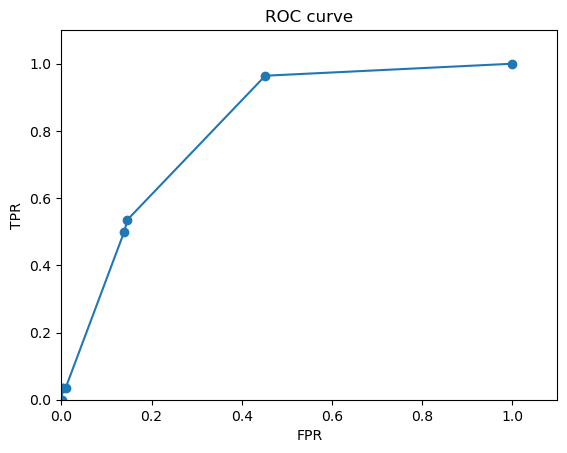

In [6]:
X_cols_2 = ["Destination_55 Cancri e", "Destination_PSO J318.5-22",
          "Destination_TRAPPIST-1e", "HomePlanet_Earth",
          "HomePlanet_Europa", "HomePlanet_Mars", "FoodCourt",
          "Spa"]
y_col_2 = "VIP"

X_classification = df[X_cols_2]
y_classification = df[y_col_2]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_classification, y_classification, test_size = 0.3, random_state = 42)

classification_tree_model = DecisionTreeClassifier(max_depth=4, max_leaf_nodes = 10, random_state = 42)
classification_tree_model.fit(X_train_c, y_train_c)

y_probability = classification_tree_model.predict_proba(X_test_c)[:, 1]

print(classification_tree_model.classes_)

fpr, tpr, thresholds = roc_curve(y_test_c, y_probability)
auc_metric = auc(fpr, tpr)

print("ROC-AUC metric: ", auc_metric)

plt.plot(fpr, tpr, marker='o')
plt.ylim([0,1.1])
plt.xlim([0,1.1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC curve')
plt.show()